In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
from tqdm.notebook import tqdm
import IPython
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style("darkgrid")
from sklearn.model_selection import train_test_split
import numpy as np
import os
from wavenet_global import Wavenet

# Control panel:

In [ ]:
# Hypers and config
class Config:
    batch_size = 8
    bins = 128
    channels = 256
    dilation_depth = 10
    blocks = 1
    device = "cuda" if torch.cuda.is_available() else "cpu"
    learning_rate = 1e-5
    epochs = 1
    model_path = None # ".\model_60.pth"
    
C = Config()

# Exploration of data:

### Load data:

In [ ]:
# Set paths 
PATH = # "https://github.com/Jakobovski/free-spoken-digit-dataset"
GEN_PATH = "./digits_for_generation/"
assert os.path.exists(PATH)

# Load audio
audio_paths = [PATH+name for name in next(os.walk(PATH))[2]]
sample = audio_paths[1]
waveform, sample_rate = torchaudio.load(sample)

### Examine data:

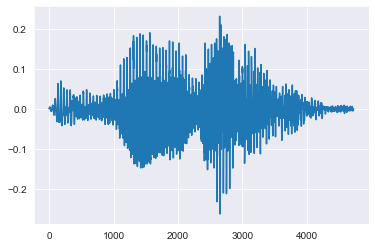

In [3]:
# Plot waveform 
plt.plot(waveform[0]);
IPython.display.Audio(sample)

In [1]:
# Histogram of audio length (samples)
paths = []
for path in audio_paths:
    paths.append(torchaudio.load(path)[0].squeeze(0).shape[0])
plt.hist(paths, bins=50);

NameError: name 'audio_paths' is not defined

In [2]:
# Cumulative sum curve
plt.plot(sorted(paths)[-100:])
cut_off = sorted(paths)[-100]; cut_off

NameError: name 'plt' is not defined

# Datasets and DataLoaders

### Format data:

In [6]:
data = []
for path in audio_paths:
    number_of_samples = torchaudio.load(path)[0].squeeze(0).shape[0]
    if number_of_samples <= cut_off:
        label = torch.tensor(int(path.split("/")[-1][0]))
        data.append( (path,label) )

### Dataset:

In [7]:
class DigitDataset:
    def __init__(self, data, pad_max):
        self.data = data # (path, label)
        self.pad_max = pad_max

    def __len__(self):
        return len(self.data)

    def __getitem__(self, i):
        path, label = self.data[i]
        waveform = torchaudio.load(path)[0].squeeze(0)
        num_zero_pad = self.pad_max - waveform.shape[0]
        waveform_padded = F.pad(waveform, pad=(0,num_zero_pad))
        return waveform_padded, label

### DataLoaders:

In [8]:
train_index, test_index = train_test_split(np.arange(len(data)), test_size=0.1)
train_dataset = DigitDataset([data[i] for i in train_index], cut_off)
test_dataset = DigitDataset([data[i] for i in test_index], cut_off)
train_dl = torch.utils.data.DataLoader(train_dataset, batch_size=C.batch_size, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Model:

In [29]:
# Load model
model = Wavenet(C.bins, C.channels, C.dilation_depth, C.blocks)
if C.model_path: model.load_state_dict(torch.load(C.model_path))
model.to(C.device)

# Optimizer and loss
optim = torch.optim.Adam(model.parameters(), lr=C.learning_rate)
criterion = torch.nn.CrossEntropyLoss()

RuntimeError: Error(s) in loading state_dict for Wavenet:
	Missing key(s) in state_dict: "causal_layers.0.conv_f.weight", "causal_layers.0.conv_f.bias", "causal_layers.0.conv_g.weight", "causal_layers.0.conv_g.bias", "causal_layers.0.gc_layer_f.weight", "causal_layers.0.gc_layer_f.bias", "causal_layers.0.gc_layer_g.weight", "causal_layers.0.gc_layer_g.bias", "causal_layers.1.conv_f.weight", "causal_layers.1.conv_f.bias", "causal_layers.1.conv_g.weight", "causal_layers.1.conv_g.bias", "causal_layers.1.gc_layer_f.weight", "causal_layers.1.gc_layer_f.bias", "causal_layers.1.gc_layer_g.weight", "causal_layers.1.gc_layer_g.bias", "causal_layers.2.conv_f.weight", "causal_layers.2.conv_f.bias", "causal_layers.2.conv_g.weight", "causal_layers.2.conv_g.bias", "causal_layers.2.gc_layer_f.weight", "causal_layers.2.gc_layer_f.bias", "causal_layers.2.gc_layer_g.weight", "causal_layers.2.gc_layer_g.bias", "causal_layers.3.conv_f.weight", "causal_layers.3.conv_f.bias", "causal_layers.3.conv_g.weight", "causal_layers.3.conv_g.bias", "causal_layers.3.gc_layer_f.weight", "causal_layers.3.gc_layer_f.bias", "causal_layers.3.gc_layer_g.weight", "causal_layers.3.gc_layer_g.bias", "causal_layers.4.conv_f.weight", "causal_layers.4.conv_f.bias", "causal_layers.4.conv_g.weight", "causal_layers.4.conv_g.bias", "causal_layers.4.gc_layer_f.weight", "causal_layers.4.gc_layer_f.bias", "causal_layers.4.gc_layer_g.weight", "causal_layers.4.gc_layer_g.bias", "causal_layers.5.conv_f.weight", "causal_layers.5.conv_f.bias", "causal_layers.5.conv_g.weight", "causal_layers.5.conv_g.bias", "causal_layers.5.gc_layer_f.weight", "causal_layers.5.gc_layer_f.bias", "causal_layers.5.gc_layer_g.weight", "causal_layers.5.gc_layer_g.bias", "causal_layers.6.conv_f.weight", "causal_layers.6.conv_f.bias", "causal_layers.6.conv_g.weight", "causal_layers.6.conv_g.bias", "causal_layers.6.gc_layer_f.weight", "causal_layers.6.gc_layer_f.bias", "causal_layers.6.gc_layer_g.weight", "causal_layers.6.gc_layer_g.bias", "causal_layers.7.conv_f.weight", "causal_layers.7.conv_f.bias", "causal_layers.7.conv_g.weight", "causal_layers.7.conv_g.bias", "causal_layers.7.gc_layer_f.weight", "causal_layers.7.gc_layer_f.bias", "causal_layers.7.gc_layer_g.weight", "causal_layers.7.gc_layer_g.bias", "causal_layers.8.conv_f.weight", "causal_layers.8.conv_f.bias", "causal_layers.8.conv_g.weight", "causal_layers.8.conv_g.bias", "causal_layers.8.gc_layer_f.weight", "causal_layers.8.gc_layer_f.bias", "causal_layers.8.gc_layer_g.weight", "causal_layers.8.gc_layer_g.bias", "causal_layers.9.conv_f.weight", "causal_layers.9.conv_f.bias", "causal_layers.9.conv_g.weight", "causal_layers.9.conv_g.bias", "causal_layers.9.gc_layer_f.weight", "causal_layers.9.gc_layer_f.bias", "causal_layers.9.gc_layer_g.weight", "causal_layers.9.gc_layer_g.bias". 
	Unexpected key(s) in state_dict: "local_conv.0.weight", "local_conv.0.bias", "causal_layers.0.conv_filter.weight", "causal_layers.0.conv_filter.bias", "causal_layers.0.conv_gate.weight", "causal_layers.0.conv_gate.bias", "causal_layers.0.local_conv_filter.0.weight", "causal_layers.0.local_conv_filter.0.bias", "causal_layers.0.local_conv_gate.0.weight", "causal_layers.0.local_conv_gate.0.bias", "causal_layers.1.conv_filter.weight", "causal_layers.1.conv_filter.bias", "causal_layers.1.conv_gate.weight", "causal_layers.1.conv_gate.bias", "causal_layers.1.local_conv_filter.0.weight", "causal_layers.1.local_conv_filter.0.bias", "causal_layers.1.local_conv_gate.0.weight", "causal_layers.1.local_conv_gate.0.bias", "causal_layers.2.conv_filter.weight", "causal_layers.2.conv_filter.bias", "causal_layers.2.conv_gate.weight", "causal_layers.2.conv_gate.bias", "causal_layers.2.local_conv_filter.0.weight", "causal_layers.2.local_conv_filter.0.bias", "causal_layers.2.local_conv_gate.0.weight", "causal_layers.2.local_conv_gate.0.bias", "causal_layers.3.conv_filter.weight", "causal_layers.3.conv_filter.bias", "causal_layers.3.conv_gate.weight", "causal_layers.3.conv_gate.bias", "causal_layers.3.local_conv_filter.0.weight", "causal_layers.3.local_conv_filter.0.bias", "causal_layers.3.local_conv_gate.0.weight", "causal_layers.3.local_conv_gate.0.bias", "causal_layers.4.conv_filter.weight", "causal_layers.4.conv_filter.bias", "causal_layers.4.conv_gate.weight", "causal_layers.4.conv_gate.bias", "causal_layers.4.local_conv_filter.0.weight", "causal_layers.4.local_conv_filter.0.bias", "causal_layers.4.local_conv_gate.0.weight", "causal_layers.4.local_conv_gate.0.bias", "causal_layers.5.conv_filter.weight", "causal_layers.5.conv_filter.bias", "causal_layers.5.conv_gate.weight", "causal_layers.5.conv_gate.bias", "causal_layers.5.local_conv_filter.0.weight", "causal_layers.5.local_conv_filter.0.bias", "causal_layers.5.local_conv_gate.0.weight", "causal_layers.5.local_conv_gate.0.bias", "causal_layers.6.conv_filter.weight", "causal_layers.6.conv_filter.bias", "causal_layers.6.conv_gate.weight", "causal_layers.6.conv_gate.bias", "causal_layers.6.local_conv_filter.0.weight", "causal_layers.6.local_conv_filter.0.bias", "causal_layers.6.local_conv_gate.0.weight", "causal_layers.6.local_conv_gate.0.bias", "causal_layers.7.conv_filter.weight", "causal_layers.7.conv_filter.bias", "causal_layers.7.conv_gate.weight", "causal_layers.7.conv_gate.bias", "causal_layers.7.local_conv_filter.0.weight", "causal_layers.7.local_conv_filter.0.bias", "causal_layers.7.local_conv_gate.0.weight", "causal_layers.7.local_conv_gate.0.bias", "causal_layers.8.conv_filter.weight", "causal_layers.8.conv_filter.bias", "causal_layers.8.conv_gate.weight", "causal_layers.8.conv_gate.bias", "causal_layers.8.local_conv_filter.0.weight", "causal_layers.8.local_conv_filter.0.bias", "causal_layers.8.local_conv_gate.0.weight", "causal_layers.8.local_conv_gate.0.bias", "causal_layers.9.conv_filter.weight", "causal_layers.9.conv_filter.bias", "causal_layers.9.conv_gate.weight", "causal_layers.9.conv_gate.bias", "causal_layers.9.local_conv_filter.0.weight", "causal_layers.9.local_conv_filter.0.bias", "causal_layers.9.local_conv_gate.0.weight", "causal_layers.9.local_conv_gate.0.bias". 

# Helper functions:

In [ ]:
def get_gc(labels):
    return F.one_hot(labels, num_classes=10).to(C.device).float()

def one_hot(input, bins):
    as_int64 = input.long()
    one_hotted = F.one_hot(as_int64, num_classes=bins)
    correct_dims = one_hotted.transpose(1,2)
    as_float32 = correct_dims.float()
    return as_float32

# Train:

  0%|          | 0/327 [00:00<?, ?it/s]

avg_test: 2.322595395275817 | avg_train: 3.273376242465565


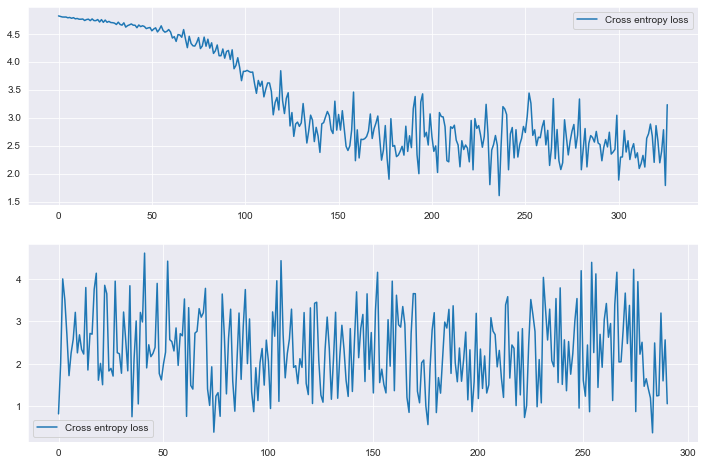

In [14]:
# Mu-law encoding 
mu = torchaudio.transforms.MuLawEncoding(quantization_channels=C.bins)
mu_decoder = torchaudio.transforms.MuLawDecoding(quantization_channels=C.bins)

avg_losses = []
avg_test_losses = []

# Training loop
for epoch in range(C.epochs):
    progress_bar = tqdm(train_dl, total=len(train_dl), leave=False)
    losses = []
    test_losses = []
    for i, (waveforms, labels) in enumerate(progress_bar):
        model.train()
        waveforms.to(C.device)
        labels.to(C.device)
        
        # Format data for Wavenet and its loss
        gc = get_gc(labels)
        y_true = mu(waveforms).to(C.device)
        x = one_hot(y_true, bins=C.bins)
        
        # Model predictions
        y_preds = model(x, gc)   

        # Calculates loss. The whole indexation show is just to align predictions with the true values.
        loss = criterion(y_preds[:, :, :-1], y_true[:, -y_preds.size(2)+1:])

        # Updates
        losses.append(loss.item())
        loss.backward()
        optim.step()
        optim.zero_grad()
        progress_bar.set_postfix({"train_loss": loss.detach().cpu().item()})
    
    for waveforms, labels in test_dl:
        waveforms.to(C.device)
        labels.to(C.device)
        
        gc = get_gc(labels)
        y_true = mu(waveforms).to(C.device)
        x = one_hot(y_true, bins=C.bins)
        
        # Model predictions
        y_preds = model(x, get_gc(labels))
        test_loss = criterion(y_preds[:, :, :-1], y_true[:, -y_preds.size(2)+1:])
        test_losses.append(test_loss.detach().cpu().item())
    
    print(f"avg_test: {np.mean(test_losses)} | avg_train: {np.mean(losses)}")
    avg_losses.append(np.mean(losses))
    avg_test_losses.append(np.mean(test_losses))

In [ ]:
# Plot 1
_, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

ax1.plot(losses, label="Cross entropy loss")
ax1.legend()
ax2.plot(test_losses, label="Cross entropy loss")

ax2.legend()
plt.show()

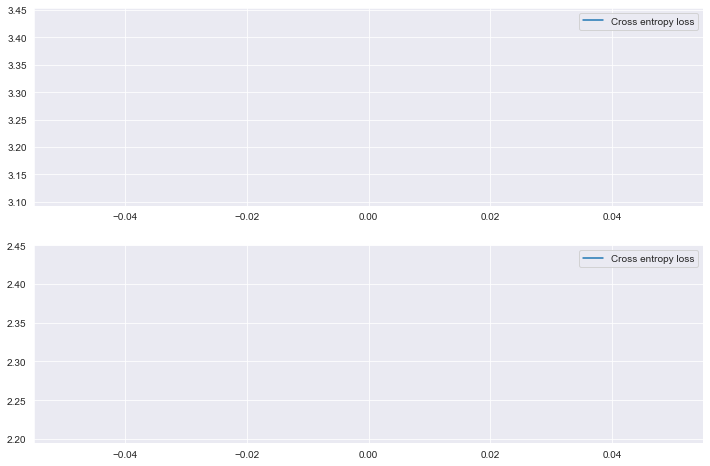

In [15]:
# Plot 2
_, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

ax1.plot(avg_losses, label="Cross entropy loss")
ax1.legend()
ax2.plot(avg_test_losses, label="Cross entropy loss")

ax2.legend()
plt.show()

# Generate samples:

### Generator:

In [22]:
def generate(seed, label, amount, model, bins):
    """
    seed --> mu-encoded tensor of shape (seed_length,)
    
    This is as inefficient as it gets, but it's intuitive.
    :param seed: start the generation process, must be at least the size of the model's receptive field. Shape (1, samples)
    :param amount: number of samples to generate
    :return: list with [seed + generated_samples]
    """

    model.eval()
    temp = seed.tolist()
    next_point = -sum(model.dilations) - 1
    for n in tqdm(range(amount), leave=False):
        input = torch.tensor(temp[next_point:]).long().to(C.device)
        input = one_hot(input.unsqueeze(0), bins)
        predictions = model(input, get_gc(label))
        predictions = torch.softmax(predictions, dim=1)
        max_index = torch.multinomial(predictions[0, :, 0], 1).squeeze()
        temp.append(max_index.item())
    return temp

### Create seed for integers 0-9:

In [23]:
gen_audio_paths = [GEN_PATH+name for name in next(os.walk(GEN_PATH))[2]]
seed_processed = [mu(torchaudio.load(path)[0][0][0:2**C.dilation_depth]) 
                  for path in gen_audio_paths]
get_seed = {i:seed_processed[i] for i, path in enumerate(gen_audio_paths)}

### Actual generation part:

  0%|          | 0/1976 [00:00<?, ?it/s]

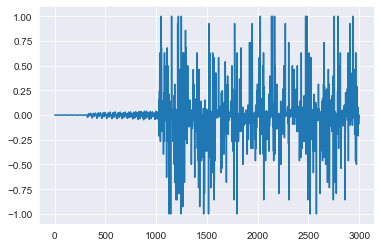

  0%|          | 0/1976 [00:00<?, ?it/s]

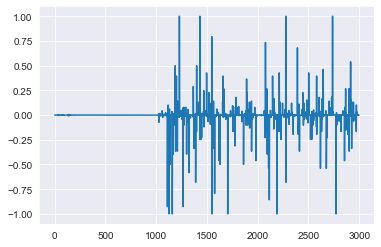

  0%|          | 0/1976 [00:00<?, ?it/s]

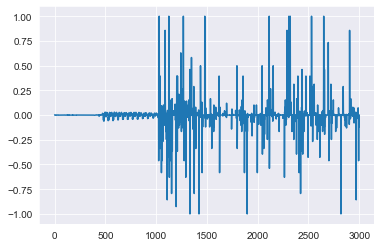

  0%|          | 0/1976 [00:00<?, ?it/s]

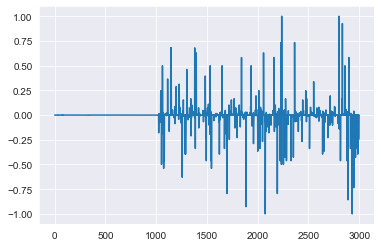

  0%|          | 0/1976 [00:00<?, ?it/s]

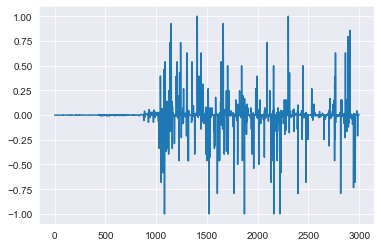

  0%|          | 0/1976 [00:00<?, ?it/s]

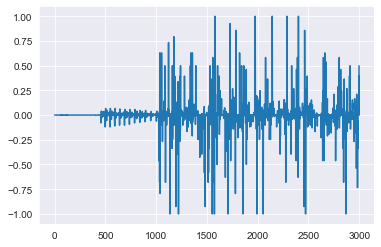

  0%|          | 0/1976 [00:00<?, ?it/s]

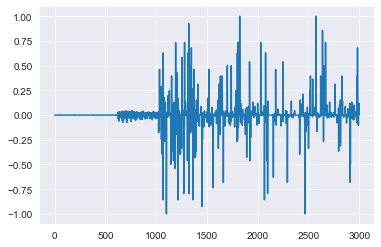

  0%|          | 0/1976 [00:00<?, ?it/s]

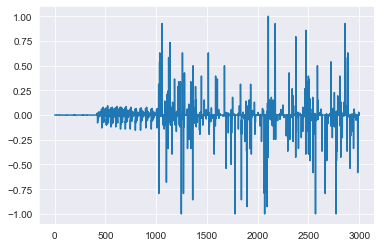

  0%|          | 0/1976 [00:00<?, ?it/s]

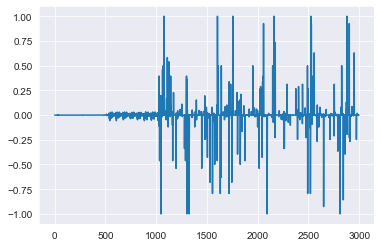

  0%|          | 0/1976 [00:00<?, ?it/s]

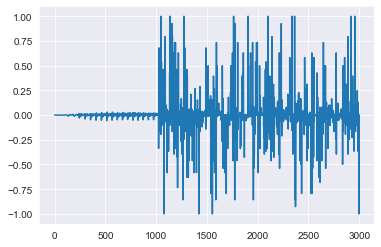

In [24]:
gens = []
for i in range(10):
    gen_amount = 3000 - 2**C.dilation_depth
    seed = get_seed[i]
    gen = generate(seed, torch.tensor([i]), gen_amount, model, C.bins)
    mu_decoded_gen = mu_decoder(torch.tensor(gen))
    gen_export = mu_decoded_gen.view(1,-1).float()
    torchaudio.save(f'{i}.wav', gen_export, sample_rate=8000)
    display(IPython.display.Audio(f"{i}.wav"))
    gens.append(gen_export.to("cpu"))
    plt.plot(gen_export[0])
    plt.show()

### Merge generated integers 0-9 into one audio file:

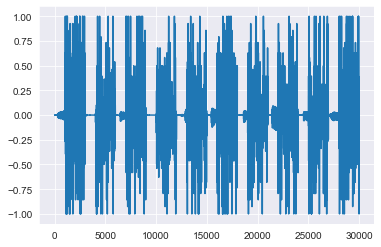

In [25]:
combined = torch.cat( tuple(gens[i][0] for i in range(10)) ).unsqueeze(0)
torchaudio.save(f'combined.wav', combined, sample_rate=8000)
display(IPython.display.Audio('combined.wav', rate=8000))
plt.plot(combined[0])
plt.show()